# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
#Setup Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
#documentation here: 
#https://numpy.org/doc/stable/reference/random/generated/numpy.random.uniform.html?
#highlight=random%20uniform#numpy.random.uniform
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
#https://www.programiz.com/python-programming/methods/built-in/zip
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
#Use library here: https://libraries.io/pypi/citipy
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

640

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
#Inspect what the API data will look like for a city - Atlanta is used as an example city
url="http://api.openweathermap.org/data/2.5/weather?"
query_url = f"{url}appid={weather_api_key}&units=imperial&q=atlanta"
response_json = requests.get(query_url).json()
pprint(response_json)

{'base': 'stations',
 'clouds': {'all': 1},
 'cod': 200,
 'coord': {'lat': 33.749, 'lon': -84.388},
 'dt': 1622040379,
 'id': 4180439,
 'main': {'feels_like': 82.45,
          'humidity': 54,
          'pressure': 1023,
          'temp': 81.19,
          'temp_max': 84.96,
          'temp_min': 77.68},
 'name': 'Atlanta',
 'sys': {'country': 'US',
         'id': 2006620,
         'sunrise': 1622025016,
         'sunset': 1622075960,
         'type': 2},
 'timezone': -14400,
 'visibility': 10000,
 'weather': [{'description': 'clear sky',
              'icon': '01d',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 163, 'gust': 7, 'speed': 1.99}}


In [6]:
#Build endpoint url for searches, using the weather_api_key defined in the first cell
url=f"http://api.openweathermap.org/data/2.5/weather?"
query_url = f"{url}appid={weather_api_key}&units=imperial&q="

max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []
lat = []
lng = []
city_list = [] 
counter = 0 

for city in cities:
     #Puts endpoint url for each city from our "cities" list created in the cell earlier
    response_json = requests.get(query_url + city).json()
    
    #Use the test print of Atlanta above to see where each of the values come from
    try:
        max_temp.append(response_json['main']['temp_max'])
        humidity.append(response_json['main']['humidity'])
        cloudiness.append(response_json['clouds']['all'])
        wind_speed.append(response_json['wind']['speed'])
        country.append(response_json['sys']['country'])
        date.append(response_json['dt'])
        lat.append(response_json['coord']['lat'])
        lng.append(response_json['coord']['lon'])
        city_list.append(city)
        counter+=1
        print(f"Processing Record {counter} | {city}")
    
    except: #Used this code found in activity 10-Stu_API_ExceptionsSolved
        print("City not found. Skipping...")
        #this pass allows the for loop to continue after the try/except code
        pass 

Processing Record 1 | kaniama
Processing Record 2 | iranshahr
Processing Record 3 | geraldton
Processing Record 4 | yellowknife
Processing Record 5 | tasiilaq
Processing Record 6 | brodokalmak
Processing Record 7 | limulunga
Processing Record 8 | tuktoyaktuk
Processing Record 9 | avera
Processing Record 10 | tezu
Processing Record 11 | paracuru
Processing Record 12 | mut
Processing Record 13 | rikitea
Processing Record 14 | tura
Processing Record 15 | busselton
Processing Record 16 | vaini
Processing Record 17 | axim
Processing Record 18 | buritis
Processing Record 19 | tucuman
Processing Record 20 | tailai
City not found. Skipping...
Processing Record 21 | ponta do sol
Processing Record 22 | una
Processing Record 23 | rio gallegos
Processing Record 24 | teguise
Processing Record 25 | asau
Processing Record 26 | hithadhoo
Processing Record 27 | digri
Processing Record 28 | eldorado
Processing Record 29 | kapaa
Processing Record 30 | saint-philippe
Processing Record 31 | zhuhai
City not

Processing Record 236 | ancud
Processing Record 237 | ruidoso
City not found. Skipping...
Processing Record 238 | east london
Processing Record 239 | krasnokamensk
Processing Record 240 | san policarpo
Processing Record 241 | puerto del rosario
Processing Record 242 | ulaanbaatar
Processing Record 243 | kyra
Processing Record 244 | ostrovnoy
Processing Record 245 | surt
Processing Record 246 | laramie
Processing Record 247 | vestmanna
Processing Record 248 | igarka
Processing Record 249 | port hedland
Processing Record 250 | tual
Processing Record 251 | tromso
Processing Record 252 | wonthaggi
Processing Record 253 | abu samrah
City not found. Skipping...
Processing Record 254 | pevek
Processing Record 255 | byron bay
Processing Record 256 | mareeba
Processing Record 257 | salinopolis
City not found. Skipping...
Processing Record 258 | north bend
Processing Record 259 | kardonikskaya
Processing Record 260 | guaraniacu
Processing Record 261 | salalah
Processing Record 262 | brae
City no

Processing Record 466 | sibi
Processing Record 467 | warwick
Processing Record 468 | klaksvik
Processing Record 469 | samarai
Processing Record 470 | derby
Processing Record 471 | coxim
Processing Record 472 | sennoy
Processing Record 473 | granadilla de abona
Processing Record 474 | olinda
Processing Record 475 | cap malheureux
Processing Record 476 | andra
Processing Record 477 | jussara
Processing Record 478 | huntsville
Processing Record 479 | darnah
Processing Record 480 | san carlos de bariloche
City not found. Skipping...
Processing Record 481 | carora
Processing Record 482 | belur
Processing Record 483 | roald
Processing Record 484 | isla mujeres
Processing Record 485 | beloha
City not found. Skipping...
Processing Record 486 | ranong
Processing Record 487 | nicoya
Processing Record 488 | sambava
Processing Record 489 | grindavik
Processing Record 490 | canton
Processing Record 491 | bonavista
Processing Record 492 | nago
Processing Record 493 | abu road
Processing Record 494 |

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
#Create a data frame from the lists created through iteration through the api request in earlier cells
city_data=pd.DataFrame({
    'City': city_list,
    'Lat': lat,
    'Lng': lng,
    'Max Temp': max_temp,
    'Humidity': humidity,
    'Cloudiness': cloudiness,
    'Wind Speed': wind_speed,
    'Country': country,
    'Date': date
})

#Import dependencies to convert dataframe to csv
import os
import csv
# Export Dataframe into a .csv
city_data.to_csv("../output_data/cities.csv")

city_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,kaniama,-7.5667,24.1833,84.15,28,5,2.68,CD,1622040739
1,iranshahr,27.2025,60.6848,107.94,9,0,18.41,IR,1622040739
2,geraldton,-28.7667,114.6000,61.21,41,100,14.63,AU,1622040739
3,yellowknife,62.4560,-114.3525,42.33,45,20,5.01,CA,1622040570
4,tasiilaq,65.6145,-37.6368,36.28,97,100,40.00,GL,1622040740


In [8]:
#Pring the stats for the dataframe
city_data.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,592.000000,592.000000,592.000000,592.000000,592.000000,592.000000,5.920000e+02
mean,19.355400,16.692154,68.177838,64.751689,55.788851,8.214020,1.622041e+09
std,33.121959,87.597374,18.039233,23.047457,39.104368,5.796217,7.443401e+01
min,-54.800000,-179.166700,16.880000,4.000000,0.000000,0.000000,1.622040e+09
25%,-8.443800,-57.191875,56.697500,51.000000,16.750000,4.000000,1.622041e+09
50%,22.839750,20.150000,71.365000,68.000000,65.000000,6.910000,1.622041e+09
75%,46.419875,88.852925,81.435000,83.000000,96.250000,11.377500,1.622041e+09
max,78.218600,179.316700,107.940000,100.000000,100.000000,40.000000,1.622041e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [ ]:
#Based on the data above, there are no cities where the humididty is >100%, therefore, we do not need to drop any of cities.

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

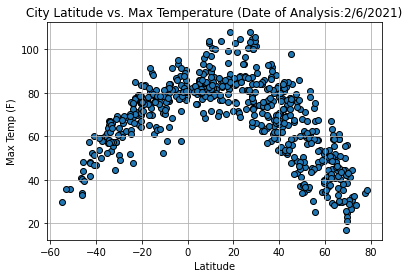

In [9]:
plt.scatter(city_data["Lat"],city_data["Max Temp"],edgecolors="black") #black edgecolors allow for a black border around the data points
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
plt.title('City Latitude vs. Max Temperature (Date of Analysis:2/6/2021)')
plt.grid()
plt.savefig("../images/scatter1_latvstemp.png") #in order to actually save an image of a plot, I discovered I had to save the image BEFORE displaying it
plt.show()

## Latitude vs. Humidity Plot

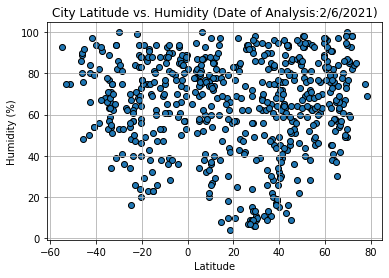

In [10]:
plt.scatter(city_data["Lat"],city_data["Humidity"],edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title('City Latitude vs. Humidity (Date of Analysis:2/6/2021)')
plt.grid()
plt.savefig("../images/scatter2_latvshumidity.png")
plt.show()

## Latitude vs. Cloudiness Plot

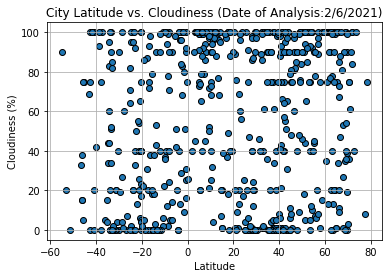

In [11]:
plt.scatter(city_data["Lat"],city_data["Cloudiness"],edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title('City Latitude vs. Cloudiness (Date of Analysis:2/6/2021)')
plt.grid()
plt.savefig("../images/scatter3_latvscloud.png")
plt.show()

## Latitude vs. Wind Speed Plot

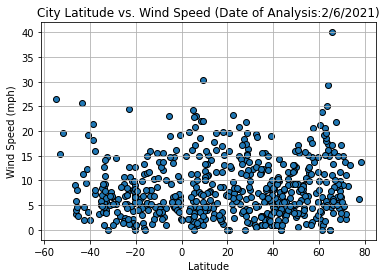

In [12]:
plt.scatter(city_data["Lat"],city_data["Wind Speed"],edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title('City Latitude vs. Wind Speed (Date of Analysis:2/6/2021)')
plt.grid()
plt.savefig("../images/scatter4_latvswind.png")
plt.show()

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is -0.79.


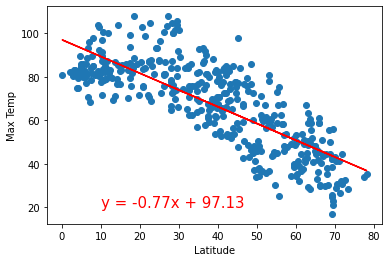

In [13]:
#Import correlation module
import scipy.stats as st 

#Create northern hemisphere data, which contains latitudes greater than or equal to zero
northhem_data = city_data.loc[city_data['Lat'] >= 0]
correlation = st.pearsonr(northhem_data["Lat"],northhem_data["Max Temp"])
print(f"The r-value is {round(correlation[0],2)}.")

(slope, intercept, rvalue, pvalue, stderr) = linregress(northhem_data["Lat"],northhem_data["Max Temp"])
regress_values = northhem_data["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(northhem_data["Lat"],northhem_data["Max Temp"])
plt.plot(northhem_data["Lat"],regress_values,"r-")
plt.annotate(line_eq,(10,20),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.savefig("../images/regression1_north_latvstemp.png")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is 0.82.


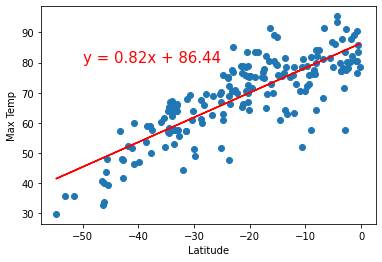

In [14]:
#Create southern hemisphere data, which contains latitudes less than zero
southhem_data = city_data.loc[city_data['Lat'] < 0]

correlation = st.pearsonr(southhem_data["Lat"],southhem_data["Max Temp"])
print(f"The r-value is {round(correlation[0],2)}.")

(slope, intercept, rvalue, pvalue, stderr) = linregress(southhem_data["Lat"],southhem_data["Max Temp"])
regress_values = southhem_data["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(southhem_data["Lat"],southhem_data["Max Temp"])
plt.plot(southhem_data["Lat"],regress_values,"r-")
plt.annotate(line_eq,(-50,80),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.savefig("../images/regression2_south_latvstemp.png")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is 0.1228719013403399.


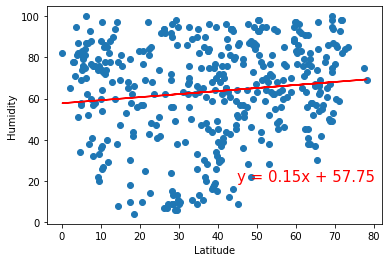

In [15]:
#Create northern hemisphere data
correlation = st.pearsonr(northhem_data["Lat"],northhem_data["Humidity"])
print(f"The r-value is {correlation[0]}.")

(slope, intercept, rvalue, pvalue, stderr) = linregress(northhem_data["Lat"],northhem_data["Humidity"])
regress_values = northhem_data["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(northhem_data["Lat"],northhem_data["Humidity"])
plt.plot(northhem_data["Lat"],regress_values,"r-")
plt.annotate(line_eq,(45,20),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.savefig("../images/regression3_north_latvshumidity.png")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is -0.027587713522270327.


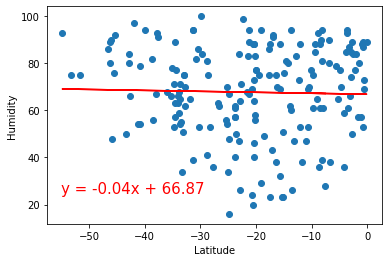

In [16]:
#Create southern hemisphere humidity data
correlation = st.pearsonr(southhem_data["Lat"],southhem_data["Humidity"])
print(f"The r-value is {correlation[0]}.")

(slope, intercept, rvalue, pvalue, stderr) = linregress(southhem_data["Lat"],southhem_data["Humidity"])
regress_values = southhem_data["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(southhem_data["Lat"],southhem_data["Humidity"])
plt.plot(southhem_data["Lat"],regress_values,"r-")
plt.annotate(line_eq,(-55,25),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.savefig("../images/regression4_south_latvshumidity.png")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is -0.0577284618796862.


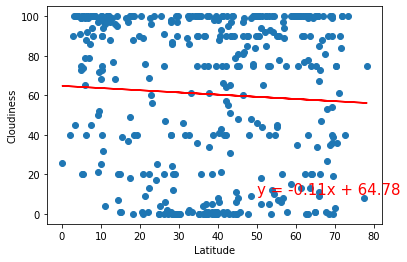

In [17]:
#Create northern hemisphere - cloudiness data
correlation = st.pearsonr(northhem_data["Lat"],northhem_data["Cloudiness"])
print(f"The r-value is {correlation[0]}.")

(slope, intercept, rvalue, pvalue, stderr) = linregress(northhem_data["Lat"],northhem_data["Cloudiness"])
regress_values = northhem_data["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(northhem_data["Lat"],northhem_data["Cloudiness"])
plt.plot(northhem_data["Lat"],regress_values,"r-")
plt.annotate(line_eq,(50,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.savefig("../images/regression5_north_latvscloud.png")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is 0.10250262859887244.


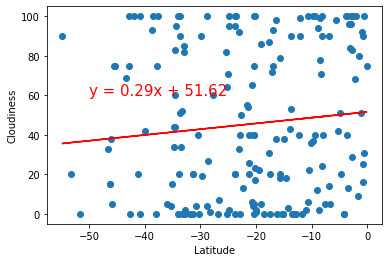

In [18]:
#Create southern hemisphere cloudiness data
correlation = st.pearsonr(southhem_data["Lat"],southhem_data["Cloudiness"])
print(f"The r-value is {correlation[0]}.")

(slope, intercept, rvalue, pvalue, stderr) = linregress(southhem_data["Lat"],southhem_data["Cloudiness"])
regress_values = southhem_data["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(southhem_data["Lat"],southhem_data["Cloudiness"])
plt.plot(southhem_data["Lat"],regress_values,"r-")
plt.annotate(line_eq,(-50,60),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.savefig("../images/regression6_south_latvscloud.png")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is 0.02963648131739681.


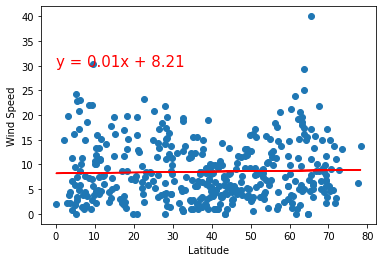

In [19]:
#Create northern hemisphere wind speed data
correlation = st.pearsonr(northhem_data["Lat"],northhem_data["Wind Speed"])
print(f"The r-value is {correlation[0]}.")

(slope, intercept, rvalue, pvalue, stderr) = linregress(northhem_data["Lat"],northhem_data["Wind Speed"])
regress_values = northhem_data["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(northhem_data["Lat"],northhem_data["Wind Speed"])
plt.plot(northhem_data["Lat"],regress_values,"r-")
plt.annotate(line_eq,(0,30),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.savefig("../images/regression7_north_latvswind.png")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is -0.09331061667135951.


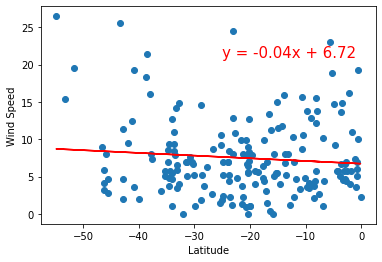

In [20]:
#Create Southern Hemisphere Wind Speed Data
correlation = st.pearsonr(southhem_data["Lat"],southhem_data["Wind Speed"])
print(f"The r-value is {correlation[0]}.")

(slope, intercept, rvalue, pvalue, stderr) = linregress(southhem_data["Lat"],southhem_data["Wind Speed"])
regress_values = southhem_data["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(southhem_data["Lat"],southhem_data["Wind Speed"])
plt.plot(southhem_data["Lat"],regress_values,"r-")
plt.annotate(line_eq,(-25,21),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.savefig("../images/regression8_south_latvswind.png")
plt.show()